<h1><center> R to Python<br><br>Marketing Research and Analytics<br><br>CHAPTER 8: Reducing Data Complexity</center></h1>

This tutorial aims at providing the python code for the book *R for Marketing Research and Analytics* (Chapman, Christopher N., McDonnell Feit, Elea). We will follow the chapters of the book and provide a Python version of the R code presented in the book.
<br>In this tutorial, we tackle chapter 8 of the book. Please look at the other tutorials for other chapters.

<font color=crimson>**Reducing Data Complexity**</font>:
<br>In this chapter, we study 3 common methods for complexity reduction.
1. **Principal Component Analysis (PCA)**: find uncorrelated linear dimensions that capture maximal variance in the data.
2. **Exploratory factor Analysis (EFA)**: capture variance with a small number of dimensions while seeking to make dimensions interpretable in terms of original variables.
3. **Multidimensional scaling (MDS)**: maps similarities among observations in terms of a low dimension space (e.g. 2-dimensional plot).

## STEP 1: Importing the required libraries

In [1]:
#Libraries for data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import datetime
from datetime import date
from dateutil.relativedelta import relativedelta
import calendar
from sklearn.feature_selection import chi2
from io import StringIO
import scipy as sp
from scipy import stats
import astropy
from astropy import stats
from statsmodels.distributions.empirical_distribution import ECDF
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
#Libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
#Below code allows for the graphs to be plotted directly under the coding cell
%matplotlib inline 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 11, 7

C:\Users\cdague\AppData\Local\Continuum\anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## STEP 2: Importing the dataset for brand data

In [3]:
#Import csv file 
brand_df=pd.read_csv('brand.csv')

## STEP 3: Preliminary data inspection

In [4]:
brand_df.shape

(1000, 10)

In [5]:
brand_df.describe()

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,4.488000,4.417000,6.195000,6.06800,4.323000,4.259000,4.33700,5.220000,3.727000
std,3.203454,2.608432,3.078059,2.74425,2.778199,2.667027,2.39858,2.742101,2.544592
min,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000
25%,1.000000,2.000000,4.000000,4.00000,2.000000,2.000000,2.00000,3.000000,1.000000
50%,4.000000,4.000000,7.000000,6.00000,4.000000,4.000000,4.00000,5.000000,3.000000
75%,7.000000,6.000000,9.000000,8.00000,6.000000,6.000000,6.00000,7.000000,5.000000
max,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.00000,10.000000,10.000000


In [6]:
brand_df.describe(include=['O']) #10 brands

,brand
count,1000
unique,10
top,j
freq,100


In [7]:
brand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
perform    1000 non-null int64
leader     1000 non-null int64
latest     1000 non-null int64
fun        1000 non-null int64
serious    1000 non-null int64
bargain    1000 non-null int64
value      1000 non-null int64
trendy     1000 non-null int64
rebuy      1000 non-null int64
brand      1000 non-null object
dtypes: int64(9), object(1)
memory usage: 78.2+ KB


**Classification of variables**
- Categorical variable: brand
- Discrete variables: perform, leader, latest, fun, serious, value, trendy, rebuy

In [8]:
brand_df['brand'].value_counts() #All brands have same number of occurence (100 occurences)

j    100
h    100
i    100
f    100
g    100
d    100
e    100
b    100
c    100
a    100
Name: brand, dtype: int64

## STEP 4: Rescaling the Data

<font color=blue>**The Maths behind it**</font>: **Feature scaling**
<br>Feature scaling is a method used to standardize the range of independent variables or features in the data. We usually use one of the main four methods as described below:
1. **Rescaling**: $x{\_}sc = \frac{x - min(x)}{max(x)-min(x)}$
2. **Mean normalization**: $x{\_}sc = \frac{x - mean(x)}{max(x)-min(x)}$
3. **Standardization**: makes the values of each feature in the data to have zero mean and unit variance. $$x{\_}sc = \frac{x - \overline{x}}{\sigma},$$ where $\overline{x}$ is the mean of the feature vector and $\sigma$ its standard deviation.
4. **Scaling to unit length**: $x{\_}sc = \frac{x}{\| \mathbf{x} \|}$

*To go further*: https://en.wikipedia.org/wiki/Feature_scaling

<font color=red>R code</font>: *Rescaling data*
<br>$brand.sc<-brand{\_}df$
<br>$brand.sc[,1:9]<-scale(brand{\_}df[,1:9])$

In [9]:
#Python rescale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
brand_sc=brand_df[:]
brand_sc.iloc[:, range(0,9)]=sc.fit_transform(brand_sc.iloc[:,range(0,9)])

<font color=green>**Cracking the code**</font>: **sklearn.preprocessing.StandardScaler**
<br>Standardize features by removing the mean and scaling to unit variance.
<br>**Syntax**: $from\,sklearn.preprocessing\,import\,StandardScaler$ 
<br>**Reference**: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html 

In [10]:
#Check the standardization
brand_sc.describe()

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-5.240253e-16,2.368106e-16,-3.069767e-16,8.874013e-16,-7.295553e-17,-6.918910e-16,-3.277378e-16,-3.196610e-16,1.816325e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.089370e+00,-1.310638e+00,-1.688596e+00,-1.847695e+00,-1.196697e+00,-1.222571e+00,-1.391936e+00,-1.539736e+00,-1.072221e+00
25%,-1.089370e+00,-9.270741e-01,-7.134685e-01,-7.539528e-01,-8.365716e-01,-8.474344e-01,-9.748142e-01,-8.100032e-01,-1.072221e+00
50%,-1.524118e-01,-1.599462e-01,2.616593e-01,-2.479148e-02,-1.163205e-01,-9.716048e-02,-1.405701e-01,-8.027059e-02,-2.858470e-01
75%,7.845460e-01,6.071818e-01,9.117445e-01,7.043698e-01,6.039305e-01,6.531135e-01,6.936739e-01,6.494620e-01,5.005271e-01
max,1.721504e+00,2.141438e+00,1.236787e+00,1.433531e+00,2.044433e+00,2.153661e+00,2.362162e+00,1.744061e+00,2.466462e+00


In [11]:
brand_sc.loc[:, "perform":"rebuy" ].apply(np.mean, axis=0).astype(int)

perform    0
leader     0
latest     0
fun        0
serious    0
bargain    0
value      0
trendy     0
rebuy      0
dtype: int32

In [12]:
brand_sc.loc[:, "perform":"rebuy" ].apply(np.std, axis=0)

perform    1.0
leader     1.0
latest     1.0
fun        1.0
serious    1.0
bargain    1.0
value      1.0
trendy     1.0
rebuy      1.0
dtype: float64

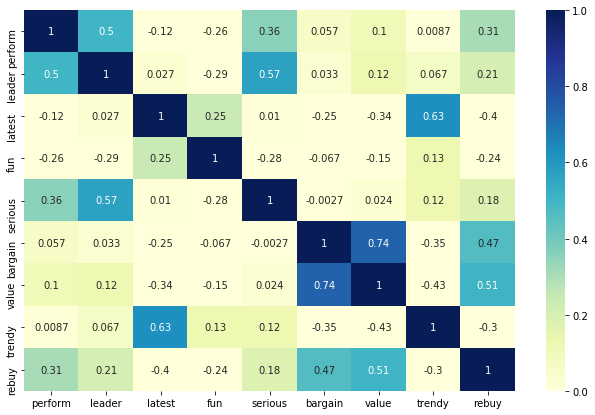

In [13]:
#Initial investigation of correlation between features
sns.heatmap(brand_df.loc[:, "perform":"rebuy"].corr(),
            annot=True,
            cmap='YlGnBu',
            vmin=0, 
            vmax=1)

In [14]:
#Aggregate mean ratings by brand
brand_mean=brand_sc.groupby('brand').mean()

Text(0.5,1,u'Brand attributes')

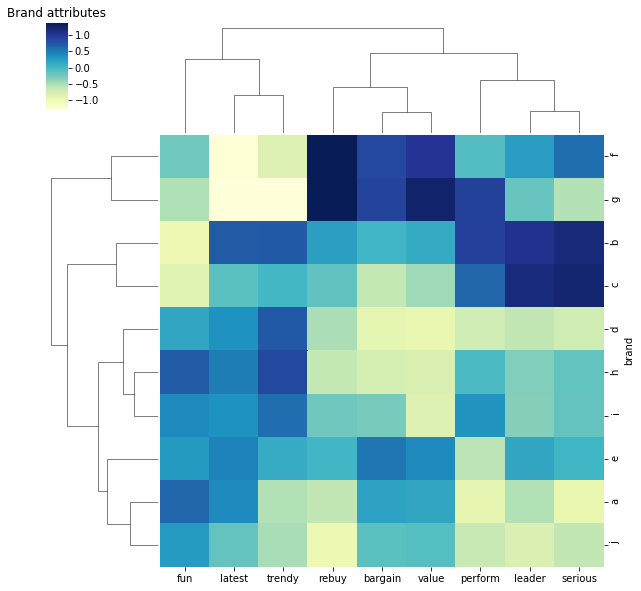

In [15]:
#Cluster map to see the similarities between the brands (group the brands by similarities)
sns.clustermap(brand_mean,
            cmap='YlGnBu')
plt.title('Brand attributes')

<font color=green>**Cracking the code**</font>: **sns.clustermap**
<br>Plot a matrix dataset as a hierarchically-clustered heatmap.
<br>**Syntax**: $sns.clustermap(data,\,method)$ 
<br>**Reference**: https://seaborn.pydata.org/generated/seaborn.clustermap.html

## STEP 5: Principal Component Analysis (PCA)

<font color=crimson>**Principal Component Analysis (PCA)**</font>:
<br>PCA rotates the dataset in such a way that the rotated features are statistically uncorrelated. PCA combines multiple predictor variables into a smaller set of variables, which are weighted linear combinations of the original dataset. the smaller set of variables, called the **principal components**, explains most of the variability of the full set of variables, reducing the dimension of the data.
<br>**Key concepts**:
- principal components are calculated so as to minimize correlation between components, thereby reducinng redundancy.
- one of the main application of PCA is dimensionality reduction for visualization purpose.

*Example*: for two variables $X_1$ and $X_2$, we define two principal components $Z_1$, $Z_2$ as follows:

$$Z_{i}=w_{i,1}X_{1}+w_{i,2}X_{2},\,\,i\in \{1,2\},$$
where the weights $w_{i,1},\,w_{i,2}$ are called the *component loadings*.
<br>$Z_{1}$ is the linear combination that best explains the variation in the data while $Z_{2}$ explains the remaining.

<br>**Downside of PCA**: it can be hard to interpret the meaning of the principal components.

<font color=red>R code</font>: *PCA: prcomp*
<br>$my.pca <- prcomp(my.vars)$
<br>$summary(my.pca)$
<br>prcomp chooses the optimal number of principal components (unlike Python where we have to specify it).

In [16]:
#PCA in Python: need to specify how many components we want to keep when creating PCA object
from sklearn.decomposition import PCA

In [17]:
pca=PCA(n_components=9)

In [18]:
#Fit the PCA model to the dataset and transform it
brand_pc=pca.fit(brand_sc.iloc[:,0:9])

<font color=green>**Cracking the code**</font>: **sklearn.decomposition.PCA**
<br>Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.
<br>**Syntax**: $sklearn.decomposition.PCA(n{\_}components)$, if $n{\_}components$ is not defined, then all components are kept.
<br>**Reference**: http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

##### Elbow method: Amount of variance that each PC explains

<font color=red>R code</font>: *scree plot*
<br>A *scree plot()* of a PCA solution shows the successive variance acccounted by each component.This is the default plot for a PCA.
<br>$plot(brand.pc,\,type="l")$

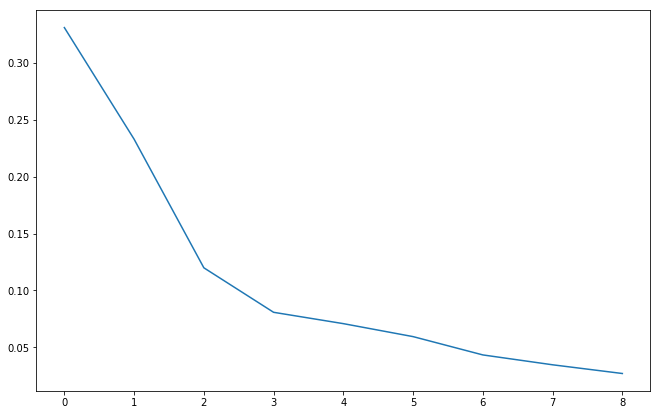

In [19]:
var=pca.explained_variance_ratio_
plt.plot(var) #Elbow occurs at either 3rd or 4th component

<font color=green>**Cracking the code**</font>: **pca.explained_variance_ratio_**
<br>This returns the percentage of variance explained  by each of the selected components.
<br>**Syntax**: $model.explained{\_}variance{\_}ratio{\_}$
<br>**Reference**: http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA

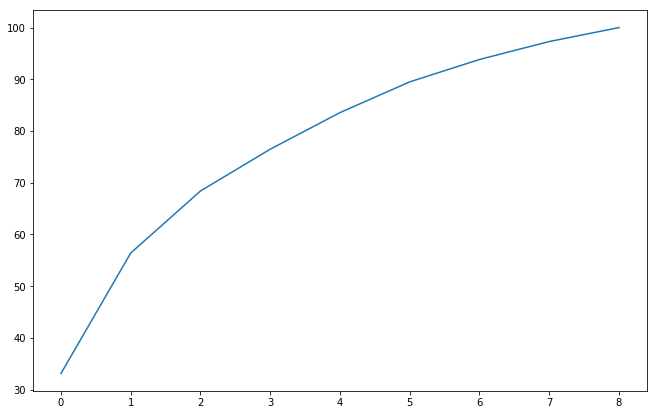

In [22]:
#Cumulative variance explained
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)

In [23]:
#We decide to  choose only 3 components as the first 2-3 components explain most of the variance
pca=PCA(n_components=3)
pca.fit(brand_sc.iloc[:,0:9])
brand_pc1=pca.fit_transform(brand_sc.iloc[:,0:9])
print(brand_pc1)

[[ 1.01036278 -1.62300786  1.81527558]
 [-1.53720937 -1.83677187 -2.00276587]
 [ 1.21200083 -2.30192495  0.69760145]
 ...
 [-1.42307927 -2.09564259  1.43414192]
 [-2.08552324 -1.19425256 -1.27692351]
 [-1.50570199  0.47303273 -0.73876216]]


##### Plot the first two principal components

<font color=red>R code</font>: *biplot*
<br>A biplot() of the first two principal components reveals how the rating adjectives are related.
<br>$biplot(brand.pc)$

In [25]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

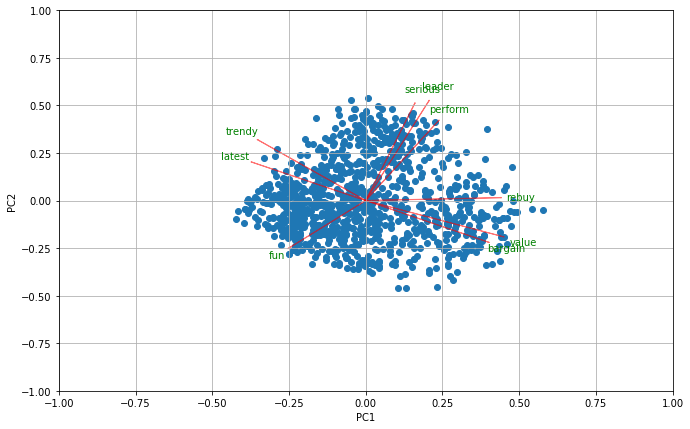

In [26]:
#Call the function. Use only the 2 PCs.
myplot(brand_pc1[:,0:2],np.transpose(pca.components_[0:2, :]), brand_sc.columns.values)
plt.show()

In [27]:
#Do the principal components analysis with the mean dataset
pca=PCA(n_components=3)
pca.fit(brand_mean)
brand_mu_pc=pca.fit_transform(brand_mean)

In [28]:
#Perceptual map and brand positioning
def myplot1(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, alpha=0.5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

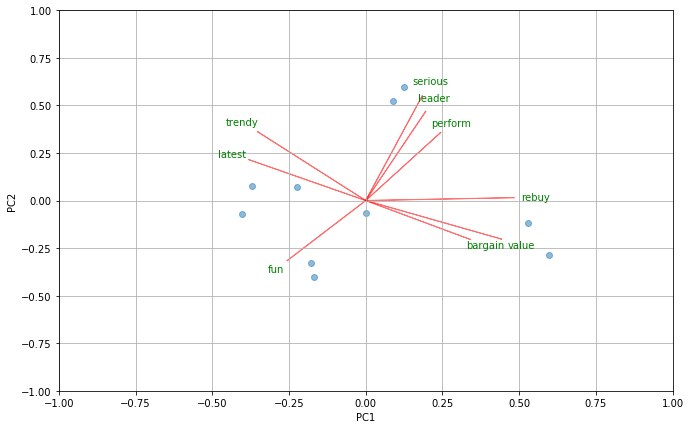

In [29]:
myplot1(brand_mu_pc[:,0:2],np.transpose(pca.components_[0:2, :]), brand_mean.columns.values)
plt.show()

## STEP 6: Exploratory Factor Analysis (EFA)

<font color=crimson>**Exploratory Factor Analysis (EFA)**</font>:
<br>Factor Analysis attempts to bring intercorrelated variables together under more general, underlying variables. *Factors* are thought of as *latent variables* that cannot be observed (e.g. stress, intelligence, creativity,...) and are imperfectly reflected through their relationship to other observed variables.
<br>The output of EFA is somewhat similar to that of PCA: a matrix of factors (or principal components) and their association with the observed variables. However, unlike PCA, EFA attempts to find **solutions that are optimally interpretable** in terms of the original variables.
<br>As for PCA, the first step of EFA is to determine the number of factors. This can be done using the elbow method and retaining factors where the eigenvalue is greater than 1.0

<font color=blue>**The Maths behind it**</font>: **Eigenvalues and Eigenvectors**
<br>Let $\mathbb{A}$ be a matrix. 
<br>**Eigenvalues**: The number $\lambda$ is an eigenvalue of $\mathbb{A}$ if and only if $\mathbb{A}-\lambda \mathbb{1}$ is singular ($\mathbb{1}$ the identity matrix), that is:
$$\lambda\,eigenvalue\,of\, \mathbb{A} \iff det(\mathbb{A}-\lambda \mathbb{1})=0$$
$det(\mathbb{A}-\lambda \mathbb{1})=0$ is called the **characteristic equation**.
<br>**Eigenvectors**: to find an eigenvector $x$ of $\mathbb{A}$, for each $\lambda$ solve $(\mathbb{A}-\lambda \mathbb{1})x=0$ or $\mathbb{A}x = \lambda x$
<br>*To go further*: http://math.mit.edu/~gs/linearalgebra/ila0601.pdf

#### Determine the optimal number of factors

<font color=red>R code</font>: *optimal number of factors*
<br>$nScree(brand.sc[,1:9])$
<br>or we can examine the eigenvalues on a correlation matrix
<br>$eigen(cor(brand.sc[,1:9]))$

In [ ]:
#In Python, there does not exist a function such as nScree, hence we use the eigenvalue method

In [21]:
#Correlation matrix
cov=brand_sc.iloc[:, 0:9].corr()
cov

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
perform,1.000000,0.500202,-0.122446,-0.256332,0.359172,0.057129,0.101946,0.008733,0.306659
leader,0.500202,1.000000,0.026890,-0.290358,0.571215,0.033094,0.118310,0.066512,0.208700
latest,-0.122446,0.026890,1.000000,0.245154,0.009952,-0.254419,-0.342714,0.627628,-0.397180
fun,-0.256332,-0.290358,0.245154,1.000000,-0.281097,-0.066553,-0.145218,0.127974,-0.237161
serious,0.359172,0.571215,0.009952,-0.281097,1.000000,-0.002656,0.023757,0.121009,0.180703
bargain,0.057129,0.033094,-0.254419,-0.066553,-0.002656,1.000000,0.739627,-0.350534,0.467381
value,0.101946,0.118310,-0.342714,-0.145218,0.023757,0.739627,1.000000,-0.434535,0.505962
trendy,0.008733,0.066512,0.627628,0.127974,0.121009,-0.350534,-0.434535,1.000000,-0.298246
rebuy,0.306659,0.208700,-0.397180,-0.237161,0.180703,0.467381,0.505962,-0.298246,1.000000


In [22]:
#Eigenvalues of the correlation matrix
eigvals, eigvecs = np.linalg.eig(cov)
eigvals

array([2.97929556, 2.09655168, 1.07925487, 0.72721099, 0.63754592,
       0.53484323, 0.39010444, 0.24314689, 0.31204642])

<font color=orange>**Let's do some interpretation**</font>:
<br>The first three eigenvalues are greater than 1 so we decide to perform analysis with 3 factors

#### Implement Exploratory Factor Analysis

<font color=red>R code</font>: *factanal*
<br>$factanal(brand.sc[,1:9],\,factors=3)$

In [23]:
from sklearn.decomposition import FactorAnalysis
fa=FactorAnalysis(n_components=3)
fa.fit(brand_sc.iloc[:, 0:9])

FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=3,
        noise_variance_init=None, random_state=0, svd_method='randomized',
        tol=0.01)

<font color=green>**Cracking the code**</font>: **sklearn.decomposition.FactorAnalysis**
<br>Performs Factor Analysis with Gaussian latent variables.
<br>**Syntax**: $sklearn.decomposition.FactorAnalysis(n{\_}components)$
<br>**Reference**: http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html

In [34]:
#Display the results
factors = pd.DataFrame(fa.components_, columns = brand_sc.iloc[:,0:9].columns.values.tolist())
factors

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
0,0.170643,0.061587,-0.858825,-0.269700,0.027767,0.572699,0.668141,-0.687795,0.572353
1,-0.236606,-0.424637,-0.377155,0.076980,-0.295387,-0.534012,-0.535555,-0.129406,-0.296603
2,0.541128,0.697429,-0.118785,-0.366896,0.617974,-0.312095,-0.231923,0.122562,0.120207


#### Heatmap of item-factor loading

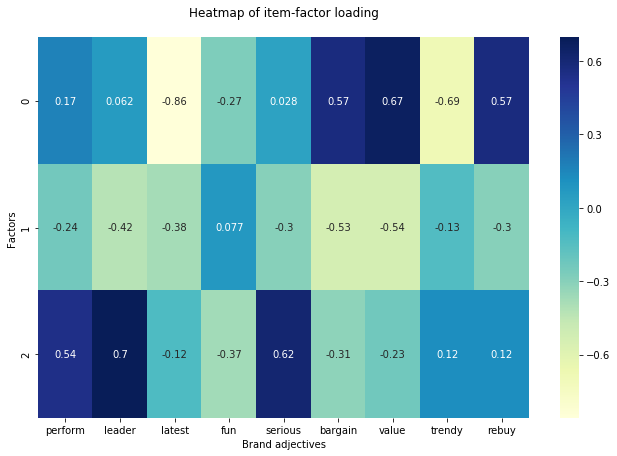

In [38]:
sns.heatmap(factors,
           annot=True,
           cmap='YlGnBu')
plt.title('Heatmap of item-factor loading\n')
plt.xlabel('Brand adjectives')
plt.ylabel('Factors')
plt.show()

## STEP 7: Multidimensional Scaling (MDS)

<font color=crimson>**Multidimensional Scaling (MDS)**</font>:
<br>Unlike PCA and EFA, MDS finds lower dimensional representations of data by working with *distances* (also called *similarities*). It creates a map that best preserves all the observed similarities between items. There exists two cases for performing MDS: metric data and non-metric data.
<br>**Metric MDS**: can simply compute the *euclidean distances* to measure similarities between items.
<br>**Non-metric MDS**: in such a case, we cannot use the euclidean distance as a measure of similarity. In R, you can use the *daisy()* function to cope with this issue.
<br>*Reference*: https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Multidimensional_Scaling.pdf

#### Metric MDS

<font color=red>R code</font>: *Metric MDS: dist() and cmdscale()* 
<br>$brand.dist <- dist(brand.mean)$
<br>$brand.mds <- cmdscale(brand.dist)$

In [43]:
#Import the useful libraries
from sklearn import manifold
from sklearn.metrics import euclidean_distances

In [46]:
#compute the Euclidean distance between points
similarities=euclidean_distances(brand_mean)

In [51]:
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9,
                   dissimilarity="precomputed", n_jobs=1)
mds.fit(similarities)

MDS(dissimilarity='precomputed', eps=1e-09, max_iter=3000, metric=True,
  n_components=2, n_init=4, n_jobs=1, random_state=None, verbose=0)

#### Non-metric MDS

<font color=red>R code</font>: *Non-Metric MDS*
<br>$brand.rank<-data.frame(lapply(brand.mean,\,function(x)\,ordered(rank(x))))$
<br>$brand.dist.r<-daisy(brand.rank,\,metric="gower")$
<br>$brand.mds.r<-isoMDS(brand.dist.r)$